# Neural Machine Translation Using Encoder Decoder

# Importing Libraries

In [50]:
import pandas as pd
import numpy as np
import string
from string import digits
import matplotlib.pyplot as plt
import re
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split 
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Model

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
cd '/content/gdrive/My Drive/MachineTranslation/'

/content/gdrive/My Drive/MachineTranslation


# Loading the Data

In [4]:
df = pd.read_csv('deu.txt', delimiter = '\t',names=["eng", "ger", "c"])

In [5]:
df.shape

(200519, 3)

In [6]:
df = df.drop(['c'], axis = 1)

In [7]:
df.sample(10)

,eng,ger
168625,What do you call this vegetable in English?,Wie nennst du dieses Gemüse auf Englisch?
100931,I've been doing some research.,Ich habe ein paar Nachforschungen angestellt.
144683,Tom can't handle this job on his own.,Tom wird mit dieser Aufgabe nicht alleine fertig.
81316,Tom doesn't want to change.,Tom will sich nicht ändern.
137308,I can assure you that you are wrong.,"Ich kann dir versichern, dass du dich irrst."
85835,I need to get my nails done.,Ich muss mir die Nägel machen lassen.
137477,I don't know much about your family.,Viel weiß ich über deine Familie nicht.
118777,Concentrate on what you're doing.,"Konzentriere dich auf das, was du gerade tust!"
181887,There was some kind of white powder on the floor.,Eine Art weißes Pulver war auf dem Boden.
166795,I went to the airport to see my friend off.,"Ich fuhr zum Flughafen, um meinen Freund zu ve..."


# Preprocessing Data

In [8]:
# Lowercase all characters
df.eng=df.eng.apply(lambda x: x.lower())
df.ger=df.ger.apply(lambda x: x.lower())

In [9]:
# Remove quotes
df.eng=df.eng.apply(lambda x: re.sub("'", '', x))
df.ger=df.ger.apply(lambda x: re.sub("'", '', x))

In [10]:
# Remove all the special characters
exclude = set(string.punctuation) # Set of all special characters

df.eng=df.eng.apply(lambda x: ''.join(ch for ch in x if ch not in exclude))
df.ger=df.ger.apply(lambda x: ''.join(ch for ch in x if ch not in exclude))

In [11]:
# Remove extra spaces
df.eng=df.eng.apply(lambda x: x.strip())
df.ger=df.ger.apply(lambda x: x.strip())

In [12]:
# Add start and end tokens to target sequences
df.eng = df.eng.apply(lambda x: 'startseq ' + x + ' endseq')
df.ger = df.ger.apply(lambda x : 'startseq '+ x + ' endseq')

In [13]:
df.sample(10)

,eng,ger
156961,startseq people always ask me why i do what i ...,startseq die leute fragen mich immer warum ich...
152201,startseq i will start working on july the firs...,startseq ich werde am ersten juli anfangen zu ...
148005,startseq if i had known i would not have come ...,startseq wenn ich das gewusst hätte wäre ich n...
172802,startseq its hard to draw a circle without a c...,startseq es ist schwierig ohne einen zirkel ei...
5777,startseq thats a risk endseq,startseq das ist ein risiko endseq
133601,startseq riding a horse is really thrilling en...,startseq auf einem pferd zu reiten ist wirklic...
82719,startseq what did you promise to do endseq,startseq was habt ihr versprochen zu tun endseq
39290,startseq tom is gaining on us endseq,startseq tom holt uns immer mehr ein endseq
140082,startseq tom is married to one of my cousins e...,startseq tom ist mit einem meiner cousins verh...
36723,startseq i owe you an apology endseq,startseq ich muss mich bei dir entschuldigen e...


# Train, Val, Test Split

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df['eng'], df['ger'],  train_size=0.8)

In [15]:
c = 0
for i in df['eng']:
  if len(i.split()) < 20:
    c+=1
(1.0*c)/len(df)

0.996519033109082

# Tokenization

In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

### English Tokenization

In [17]:
def pad_sequence(t, padding_var = 20):
    t = sequence.pad_sequences(t, maxlen=padding_var, padding='post') 
    return t

def build_data(train, test):
  print("="*100)
  print("Fitting the Tokenizer...")
  tokenizer = Tokenizer(lower=True)
  tokenizer.fit_on_texts(train)
  print("Done...")
  print('Found %s unique tokens.' % len(tokenizer.word_counts))
  print("="*100)
  print()
  print("Processing Text to sequence process")
  train = tokenizer.texts_to_sequences(train)
  test = tokenizer.texts_to_sequences(test)
  print("Done")
  print("="*100)
  print()
  print("Starting Padding Process...")  
  train = pad_sequence(train)
  test = pad_sequence(test)
  print("Done")
  return train, test, tokenizer

## English Tokenization

In [18]:
X_train, X_test, tokenizer_eng = build_data(X_train, X_test)

Fitting the Tokenizer...
Done...
Found 15148 unique tokens.

Processing Text to sequence process
Done

Starting Padding Process...
Done


## German Tokenization

In [19]:
Y_train, Y_test, tokenizer_ger = build_data(Y_train, Y_test)

Fitting the Tokenizer...
Done...
Found 31842 unique tokens.

Processing Text to sequence process
Done

Starting Padding Process...
Done


In [20]:
num_encoder_tokens = len(tokenizer_eng.word_counts)
num_decoder_tokens = len(tokenizer_ger.word_counts)+1
num_encoder_tokens, num_decoder_tokens

(15148, 31843)

# Processing Embedding Matrix

In [23]:
!python -m spacy download en_core_web_lg
!python -m spacy download de_core_news_md

     |████████████████████████████████| 827.9MB 1.2MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp36-none-any.whl size=829180944 sha256=18788b2e99932c6eac6929e78ba24c8b2815518d6615c1252886758826abad86
  Stored in directory: /tmp/pip-ephem-wheel-cache-ky8ban4y/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')
     |████████████████████████████████| 224.6MB 1.3MB/s 
  Created wheel for de-core-news-md: filename=de_core_news_md-2.2.5-cp36-none-any.whl size=228399478 sha256=0c28bf86eeb10323c570755d5158ada1e428d509c15f4a922a3b407eabe52615
  Stored in directory: /tmp/pip-ephem-wheel-cache-5z9tnl4g/wheels/41/60/41/81898870259d7c19fe8f9e46a537611c939f0c425eee2e1785
Successfully built de-core-news-md
✔ Download and installation successful
You can now load the model via spacy.load('de_core_news_md')


In [24]:
import en_core_web_lg
import de_core_news_md
eng = en_core_web_lg.load()
ger = de_core_news_md.load()

In [25]:
def build_embedding_matrix(tokenizer, build_y = False):
    base = eng
    if(build_y):
      base = ger
    embedding_matrix = np.zeros((len(tokenizer.word_counts) + 1, 300))

    for word, i in tokenizer.word_index.items():  
        embedding_matrix[i] = base(word).vector
    
    return embedding_matrix 
embedding_matrix_enc = build_embedding_matrix(tokenizer_eng)
embedding_matrix_dec = build_embedding_matrix(tokenizer_ger, build_y = True)

In [26]:
embedding_matrix_enc.shape, embedding_matrix_dec.shape

((15149, 300), (31843, 300))

# Defining The Model

In [44]:
from attention import AttentionLayer

In [45]:
class AttentionLayer(Layer):
    """
    This class implements Bahdanau attention (https://arxiv.org/pdf/1409.0473.pdf).
    There are three sets of weights introduced W_a, U_a, and V_a
     """

    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert isinstance(input_shape, list)
        # Create a trainable weight variable for this layer.

        self.W_a = self.add_weight(name='W_a',
                                   shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.U_a = self.add_weight(name='U_a',
                                   shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.V_a = self.add_weight(name='V_a',
                                   shape=tf.TensorShape((input_shape[0][2], 1)),
                                   initializer='uniform',
                                   trainable=True)

        super(AttentionLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, inputs, verbose=False):
        """
        inputs: [encoder_output_sequence, decoder_output_sequence]
        """
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)

        def energy_step(inputs, states):
            """ Step function for computing energy for a single decoder state """

            assert_msg = "States must be a list. However states {} is of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            """ Some parameters required for shaping tensors"""
            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            """ Computing S.Wa where S=[s0, s1, ..., si]"""
            # <= batch_size*en_seq_len, latent_dim
            reshaped_enc_outputs = K.reshape(encoder_out_seq, (-1, en_hidden))
            # <= batch_size*en_seq_len, latent_dim
            W_a_dot_s = K.reshape(K.dot(reshaped_enc_outputs, self.W_a), (-1, en_seq_len, en_hidden))
            if verbose:
                print('wa.s>',W_a_dot_s.shape)

            """ Computing hj.Ua """
            U_a_dot_h = K.expand_dims(K.dot(inputs, self.U_a), 1)  # <= batch_size, 1, latent_dim
            if verbose:
                print('Ua.h>',U_a_dot_h.shape)

            """ tanh(S.Wa + hj.Ua) """
            # <= batch_size*en_seq_len, latent_dim
            reshaped_Ws_plus_Uh = K.tanh(K.reshape(W_a_dot_s + U_a_dot_h, (-1, en_hidden)))
            if verbose:
                print('Ws+Uh>', reshaped_Ws_plus_Uh.shape)

            """ softmax(va.tanh(S.Wa + hj.Ua)) """
            # <= batch_size, en_seq_len
            e_i = K.reshape(K.dot(reshaped_Ws_plus_Uh, self.V_a), (-1, en_seq_len))
            # <= batch_size, en_seq_len
            e_i = K.softmax(e_i)

            if verbose:
                print('ei>', e_i.shape)

            return e_i, [e_i]

        def context_step(inputs, states):
            """ Step function for computing ci using ei """
            # <= batch_size, hidden_size
            c_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return c_i, [c_i]

        def create_inital_state(inputs, hidden_size):
            # We are not using initial states, but need to pass something to K.rnn funciton
            fake_state = K.zeros_like(inputs)  # <= (batch_size, enc_seq_len, latent_dim
            fake_state = K.sum(fake_state, axis=[1, 2])  # <= (batch_size)
            fake_state = K.expand_dims(fake_state)  # <= (batch_size, 1)
            fake_state = K.tile(fake_state, [1, hidden_size])  # <= (batch_size, latent_dim
            return fake_state

        fake_state_c = create_inital_state(encoder_out_seq, encoder_out_seq.shape[-1])
        fake_state_e = create_inital_state(encoder_out_seq, encoder_out_seq.shape[1])  # <= (batch_size, enc_seq_len, latent_dim

        """ Computing energy outputs """
        # e_outputs => (batch_size, de_seq_len, en_seq_len)
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e],
        )

        """ Computing context vectors """
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c],
        )

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        """ Outputs produced by the layer """
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]


In [93]:
def build_model(latent_dim=256):
    
    embedding_enc = Embedding(*embedding_matrix_enc.shape, weights=[embedding_matrix_enc], trainable=False, mask_zero=True, name = "Encoder_Embedding")
    embedding_dec = Embedding(*embedding_matrix_dec.shape, weights=[embedding_matrix_dec], trainable=False, mask_zero=True, name = "Decoder_Embedding")
    
    """ Encoder LSTM""" 
    encoder_inputs = Input(shape=(20,), name="encoder_input")
    enc_emb = embedding_enc(encoder_inputs) 
    enc_output, state_h, state_c = LSTM(latent_dim, return_sequences=True, return_state=True, name = "Encoder_LSTM")(enc_emb)
 
    encoder_states = [state_h, state_c]
    

    """ Decoder LSTM """ 
    decoder_inputs = Input(shape=(20,), name="decoder_input")
    dec_emb_layer = embedding_dec(decoder_inputs)
    dec_lstm = LSTM(latent_dim, return_sequences=True, return_state=True, name = "Decoder_LSTM")
    
    decoder_outputs,state_h, state_c = dec_lstm(dec_emb_layer,initial_state=encoder_states)
     
    decoder_states = [state_h, state_c]
     
    """ Attention Layer """
    attn_layer = AttentionLayer(name='attention_layer')
    attn_out, attn_states = attn_layer([enc_output, decoder_outputs])
    
    decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])
    
    dense = Dense(num_decoder_tokens, activation='softmax', name='softmax_layer')
    dense_time = TimeDistributed(dense, name='time_distributed_layer')
    decoder_pred = dense_time(decoder_concat_input)

    """ Defining Full Model """
    model = Model(inputs=[encoder_inputs, decoder_inputs], outputs = decoder_pred) 
    
    
    
    
    """ Defining Inference Model """ 
    
    # Encoder Model
     
    encoder_model = Model(inputs = encoder_inputs, outputs = [enc_output, encoder_states])
     
    """ Decoder Model """
     
    decoder_states_inputs = [Input(shape=(latent_dim,), name = "Decoder_inp_1"), Input(shape=(latent_dim,), name = "Decoder_inp_2")]
    enc_output = Input(shape=(20, latent_dim), name = "encoder_output")
    
    # To predict the next word in the sequence, set the initial states to the states from the previous time step
    decoder_outputs, state_h, state_c = dec_lstm(dec_emb_layer, initial_state=decoder_states_inputs)
    decoder_states = [state_h, state_c]
    
    attn_out, attn_states = attn_layer([enc_output, decoder_outputs])
    decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])
    
    decoder_pred = dense_time(decoder_concat_input)     
    decoder_model = Model( [enc_output, decoder_states_inputs, decoder_inputs], [decoder_pred, attn_states, decoder_states])    
    
    
    model.compile(optimizer='adam', loss='categorical_crossentropy')
    
 

    return model, encoder_model, decoder_model

In [94]:
model, encoder_model, decoder_model = build_model()

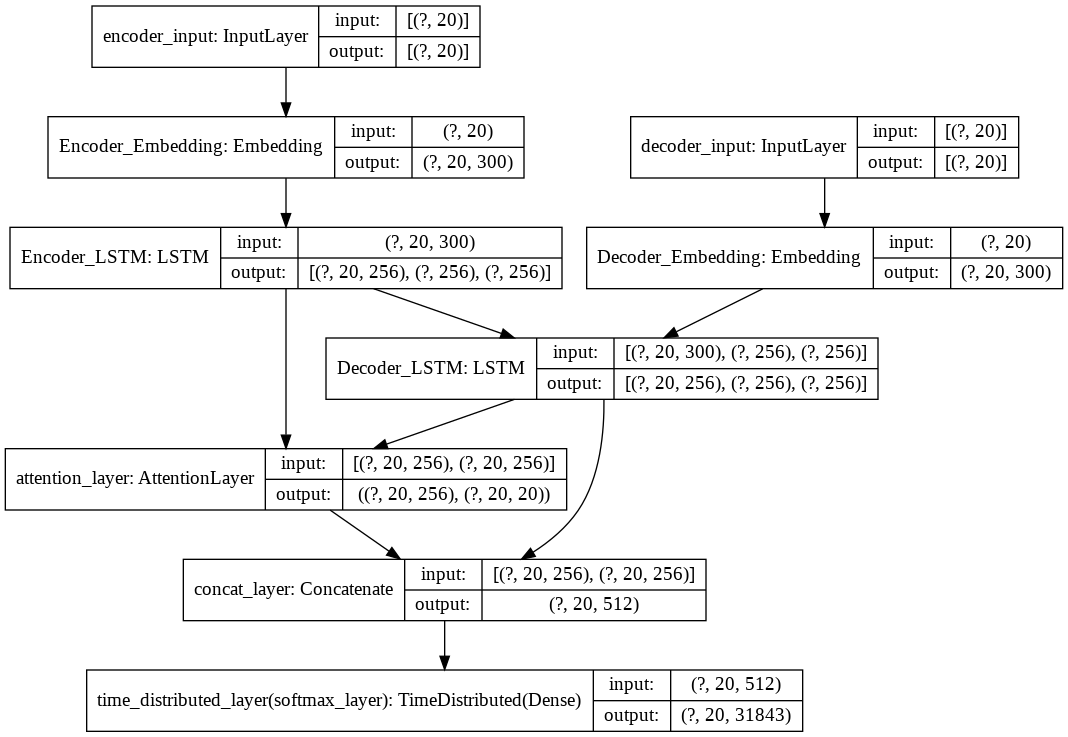

In [95]:
plot_model(model, to_file='model_att.png', show_shapes=True, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96)

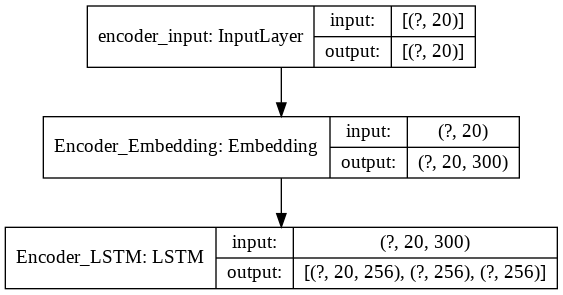

In [96]:
plot_model(
    encoder_model, to_file='encoder_model_att.png', show_shapes=True, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96
)

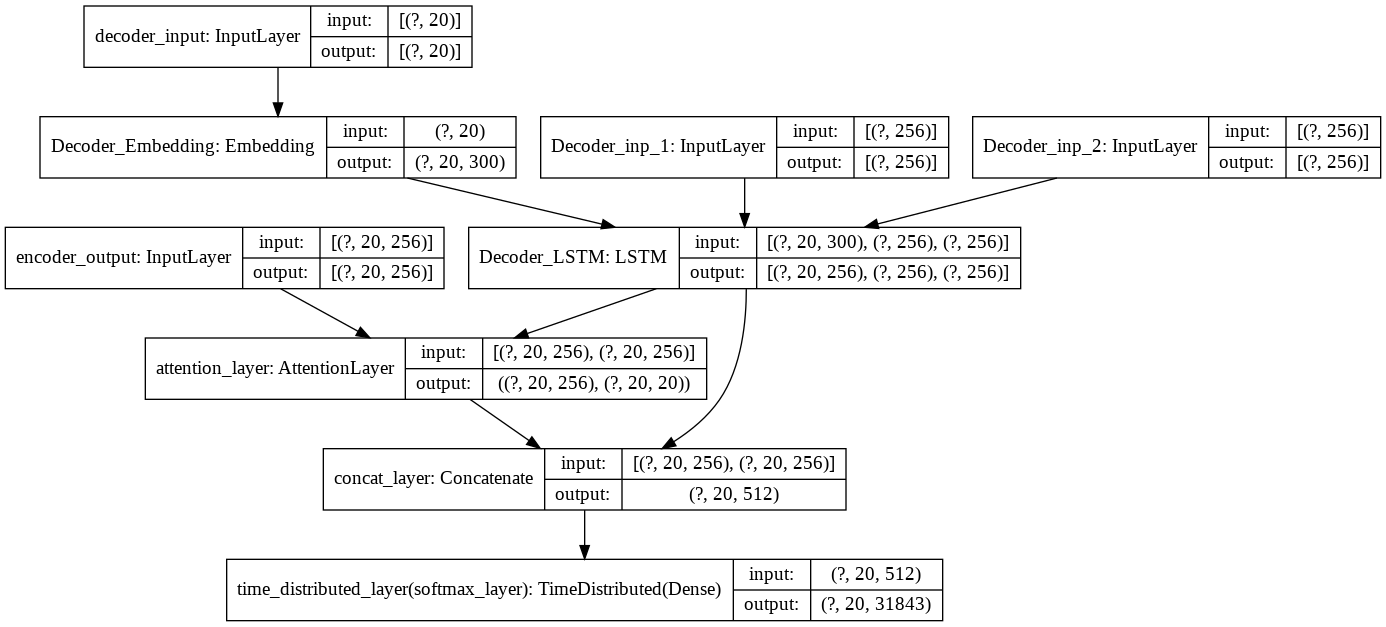

In [97]:
plot_model(
    decoder_model, to_file='decoder_model_att.png', show_shapes=True, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96
)

In [98]:
def generate_batch(X, y, batch_size):
    ''' Generate a batch of data '''
    while True:
        for j in range(0, len(X), batch_size):
            encoder_input_data = np.array(X[j:j+batch_size])
            decoder_input_data = np.array(y[j:j+batch_size])
            decoder_target_data = np.zeros((encoder_input_data.shape[0], 20, num_decoder_tokens),dtype='float32')
            for i, target_text in enumerate(y[j:j+batch_size]):
                for t, index in enumerate(target_text):
                    if t>0:
                        # decoder target sequence (one hot encoded)
                        # does not include the START_ token
                        decoder_target_data[i, t - 1, index] = 1.
           
            yield([encoder_input_data, decoder_input_data], decoder_target_data)

In [90]:
train_samples = len(X_train)
val_samples = len(X_test)
batch_size = 64
epochs = 10
train_samples, val_samples

(160415, 40104)

In [99]:
filepath="model/weights-improvement-{epoch:02d}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [100]:
model.fit_generator(generator = generate_batch(X_train, Y_train, batch_size = batch_size),
  steps_per_epoch = len(X_train)//batch_size,
  epochs=epochs,
  validation_data = generate_batch(X_test, Y_test, batch_size = batch_size),
  validation_steps = len(X_test)//batch_size,
  callbacks = callbacks_list)

Epoch 1/10
2506/2506 [==============================] - 765s 305ms/step - loss: 1.4183 - val_loss: 0.8713
Epoch 2/10
2506/2506 [==============================] - 768s 307ms/step - loss: 0.7438 - val_loss: 0.6783
Epoch 3/10
2506/2506 [==============================] - 765s 305ms/step - loss: 0.5546 - val_loss: 0.6242
Epoch 4/10
2506/2506 [==============================] - 773s 308ms/step - loss: 0.4543 - val_loss: 0.6078
Epoch 5/10
2506/2506 [==============================] - 768s 306ms/step - loss: 0.3942 - val_loss: 0.6046
Epoch 6/10
2506/2506 [==============================] - 771s 308ms/step - loss: 0.3541 - val_loss: 0.6060
Epoch 7/10
2506/2506 [==============================] - 768s 307ms/step - loss: 0.3243 - val_loss: 0.6136
Epoch 8/10
2506/2506 [==============================] - 782s 312ms/step - loss: 0.3002 - val_loss: 0.6216
Epoch 9/10
2506/2506 [==============================] - 775s 309ms/step - loss: 0.2804 - val_loss: 0.6347
Epoch 10/10
2506/2506 [=======================

In [101]:
model.save_weights('model/final_model_att.h5')

In [103]:
# saving
import pickle
with open('model/tokenizer_eng_att.pickle', 'wb') as handle:
    pickle.dump(tokenizer_eng, handle, protocol=pickle.HIGHEST_PROTOCOL)
# saving
with open('model/tokenizer_ger_att.pickle', 'wb') as handle:
    pickle.dump(tokenizer_ger, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# model.load_weights('model/final_model_att.h5')

# Inference Step

In [115]:
def sents2sequences(tokenizer, sentences, pad_length=None, padding_type='post'):
    encoded_text = tokenizer.texts_to_sequences(sentences)
    preproc_text = pad_sequences(encoded_text, padding=padding_type, maxlen=pad_length)
    return preproc_text

def decode_sequence(text, tokenizer_text = tokenizer_eng, tokenizer_Y=tokenizer_ger):
    # Text to sequence
    text = "startseq " + text + " endseq"
    text = pad_sequence(tokenizer_text.texts_to_sequences([text]))

    # Encode the input as state vectors. 
    enc_output, encoder_states = encoder_model.predict(text) 
    decoder_states = encoder_states

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))

    # Populate the first character of target sequence with the start character.
    target_seq[0, 0] = tokenizer_Y.word_index['startseq']
     
    attention_weights = []
    stop_condition = False
    decoded_sentence = ''
    
    while True:
        decoder_pred, attn_states, decoder_states = decoder_model.predict([enc_output, decoder_states, target_seq])

        dec_ind = np.argmax(decoder_pred, axis=-1)[0, 0]
        if dec_ind == tokenizer_Y.word_index['endseq'] or len(decoded_sentence.split()) > 25:
            break 
             
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = dec_ind
        attention_weights.append((dec_ind, attn_states))
        decoded_sentence += tokenizer_Y.index_word[dec_ind] + ' '

    return decoded_sentence

In [116]:
index = 22432
print("English: {}".format(df.iloc[index]['eng']))
print("Acutal Ger: {}".format(df.iloc[index]['ger']))
print("Predicted Ger: {}".format(decode_sequence(df.iloc[index]['eng']))) 

English: startseq tom will remember endseq
Acutal Ger: startseq tom wird sich erinnern endseq
Predicted Ger: tom wird sich erinnern sich erinnern 


In [122]:
index = 3523
print("English: {}".format(df.iloc[index]['eng']))
print("Acutal Ger: {}".format(df.iloc[index]['ger']))
print("Predicted Ger: {}".format(decode_sequence(df.iloc[index]['eng']))) 

English: startseq im so tired endseq
Acutal Ger: startseq ich bin so müde endseq
Predicted Ger: ich bin so müde


In [117]:
a = "hi there, how are you!"
print("English Text: {}".format(a))
print("Translated Text: {}".format(decode_sequence(a)))

English Text: hi there, how are you!
Translated Text: hallo wie geht es dir 


In [118]:
a = "let us go for a trip"
print("English Text: {}".format(a))
print("Translated Text: {}".format(decode_sequence(a)))

English Text: let us go for a trip
Translated Text: lass uns verreisen 


In [119]:
a = "Finally, I am done with this assignment"
print("English Text: {}".format(a))
print("Translated Text: {}".format(decode_sequence(a)))

English Text: Finally, I am done with this assignment
Translated Text: endlich bin endlich mit dieser arbeit fertig 
